In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, fbeta_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
    
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from xgboost import XGBClassifier

np.set_printoptions(suppress=True)

%matplotlib inline

In [16]:
def APRF2(act_t, pred_t, act_v, pred_v, th = 0.5, title=''):
    print(title)
    plt.figure(figsize=(6,6))
    
    plt.subplot(2,1,1)
    cm = confusion_matrix(act_t, pred_t)
    sns.heatmap(cm, cmap='Blues', square=True,
                annot=True, fmt='d',
               xticklabels=['No Default', 'Default'],
               yticklabels=['No Default', 'Default'])
    plt.title("Confusion Matrix")
    plt.ylabel("Defaults Actual")
    plt.xlabel("Defaults Predicted")
    
    plt.subplot(2,1,2)
    cm = confusion_matrix(act_v, pred_v)
    sns.heatmap(cm, cmap='Reds', square=True,
                annot=True, fmt='d',
               xticklabels=['No Default', 'Default'],
               yticklabels=['No Default', 'Default'])
    plt.title("Confusion Matrix")
    plt.ylabel("Defaults Actual")
    plt.xlabel("Defaults Predicted")
    
    plt.tight_layout()
    
    print("Training:")
    print("Accuracy:  {}".format(accuracy_score(act_t, pred_t)))
    print("Precision: {}".format(precision_score(act_t, pred_t, zero_division=0)))
    print("Recall:    {}".format(recall_score(act_t, pred_t, zero_division=0)))
    print("F1:        {}".format(f1_score(act_t, pred_t)))
    print("Fbeta:     {}".format(fbeta_score(act_t, pred_t, beta =2 )))
    print()
    print("Validation:")
    print("Accuracy:  {}".format(accuracy_score(act_v, pred_v)))
    print("Precision: {}".format(precision_score(act_v, pred_v, zero_division=0)))
    print("Recall:    {}".format(recall_score(act_v, pred_v, zero_division=0)))
    print("F1:        {}".format(f1_score(act_v, pred_v)))
    print("Fbeta:     {}".format(fbeta_score(act_v, pred_v, beta=2)))

  

In [17]:
with open('X_base.pkl', "rb") as file:
    X = pickle.load(file)
with open('y_base.pkl', "rb") as file:
    y = pickle.load(file)



In [18]:
X.shape, y.shape

((887379, 77), (887379,))

## Train / Validation / Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=2019)

In [20]:
import imblearn.under_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos , 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
RUS = imblearn.under_sampling.RandomUnderSampler(sampling_strategy = 1, random_state=42) 
    
X_tr_rs, y_tr_rs = RUS.fit_resample(X_train, y_train)

X_tr_rs.shape, y_tr_rs.shape

((54296, 77), (54296,))

In [21]:
# lr = LogisticRegression(solver='liblinear') 
# lr.fit(X_tr, y_tr)

# print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
#       (f1_score(y_te, lr.predict(X_te)), roc_auc_score(y_te, lr.predict_proba(X_te)[:,1]))) 

# lr_os = LogisticRegression(solver='liblinear') 
# lr_os.fit(X_tr_rs, y_tr_rs)

# print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
#       (f1_score(y_te, lr_os.predict(X_te)), roc_auc_score(y_te, lr_os.predict_proba(X_te)[:,1])))

## Dummy Classifier

Dummy - Train
Training:
Accuracy:  0.5
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0

Validation:
Accuracy:  0.9490071897045235
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0


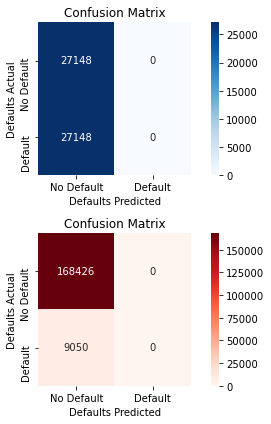

In [22]:
dum = DummyClassifier(strategy="most_frequent")
dum.fit(X_tr_rs, y_tr_rs)
y_pred_dum = dum.predict(X_tr_rs)
y_pred_dum2 = dum.predict(X_val)

APRF2(y_tr_rs, y_pred_dum, y_val, y_pred_dum2, title = "Dummy - Train")

## Decision Tree Classifier

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_tr_rs, y_tr_rs)

DecisionTreeClassifier()


Training:
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
Fbeta:     1.0

Validation:
Accuracy:  0.5472852667402917
Precision: 0.061794714197910265
Recall:    0.5554696132596685
F1:        0.11121681415929205
Fbeta:     0.21382390472139512


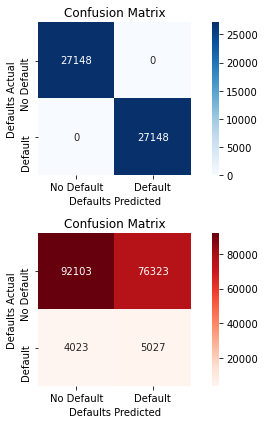

In [24]:
y_preds_tree = dt.predict(X_tr_rs)
y_preds_tree2 = dt.predict(X_val)

APRF2(y_tr_rs, y_preds_tree, y_val, y_preds_tree2 )

Best params: {'splitter': 'random', 'max_features': 33, 'max_depth': 8}

Training:
Accuracy:  0.6028620892883454
Precision: 0.5984002255188696
Recall:    0.6255341093266539
F1:        0.6116663965278153
Fbeta:     0.6199122441976769

Validation:
Accuracy:  0.5735874146363452
Precision: 0.07211847209021552
Recall:    0.6204419889502762
F1:        0.1292171031435541
Fbeta:     0.246146697294359


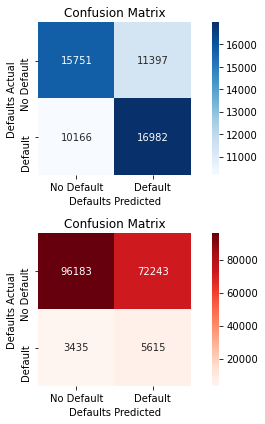

In [25]:
param_grid = {'max_depth':np.arange(1,101),
              'splitter':['random', 'best'],
              'max_features': range(1, X_tr_rs.columns.size)}
dtcr = RandomizedSearchCV(estimator=dt, cv=5, param_distributions = param_grid,
                    scoring='f1', n_iter=40)
dtcr.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {dtcr.best_params_}")
y_predict = dtcr.predict(X_tr_rs)

y_predict2 = dtcr.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

## Random Forest Classifier

In [26]:
rf = RandomForestClassifier()
rf.fit(X_tr_rs, y_tr_rs)
print(rf.score(X_tr_rs, y_tr_rs))

1.0



Training:
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
Fbeta:     1.0

Validation:
Accuracy:  0.6261128265230228
Precision: 0.08157364409007273
Recall:    0.6172375690607734
F1:        0.14410277577133423
Fbeta:     0.2668182426106727


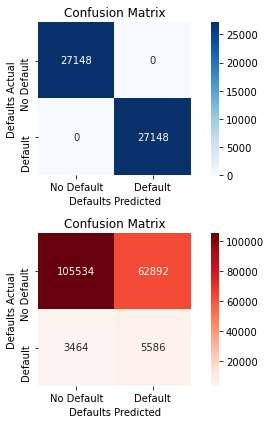

In [27]:
y_preds_rf = rf.predict(X_tr_rs)
y_preds_rf2 = rf.predict(X_val)
APRF2(y_tr_rs, y_preds_rf, y_val, y_preds_rf2)

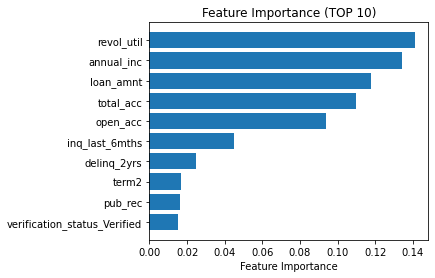

In [50]:
plt.figure(figsize=(5,4))

df = (pd.DataFrame(dict(feature = X.columns, importance=rf.feature_importances_ ))
      .sort_values('importance', ascending = True)
      .tail(10))
#df
plt.barh(df.feature, df.importance)
plt.title('Feature Importance (TOP 10)')
plt.xlabel('Feature Importance')
plt.savefig('feature_importance.png')



Best params: {'n_estimators': 50, 'max_features': 20, 'max_depth': 10, 'criterion': 'gini'}

Training:
Accuracy:  0.6833836746721674
Precision: 0.6748621404235889
Recall:    0.707750110505378
F1:        0.6909149750984376
Fbeta:     0.7009185557006632

Validation:
Accuracy:  0.6028308052919832
Precision: 0.08113120074177098
Recall:    0.6574585635359116
F1:        0.14443851046268874
Fbeta:     0.2715952454855849


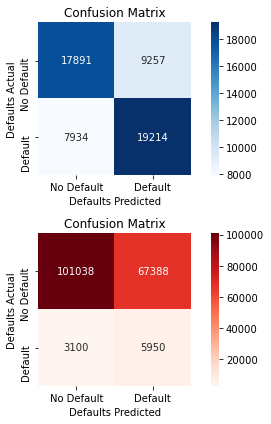

In [28]:

param_grid = {'n_estimators':[50, 100, 150, 200],
              'criterion':['gini', 'entropy'],
              'max_depth': [5, 10, 20, 30],
              'max_features': [5, 10, 20, 30, 50, X_train.columns.size]}

rfcv = RandomizedSearchCV(estimator=rf, cv=5, param_distributions = param_grid,
                    scoring='f1', n_iter=10)

rfcv.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {rfcv.best_params_}")
y_predict = rfcv.predict(X_tr_rs)

y_predict2 = rfcv.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

## XGB

In [133]:
xclf = XGBClassifier(use_label_encoder=False)
xclf.fit(X_tr_rs, y_tr_rs)

[00:14:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


Training:
Accuracy:  0.709186680418447
Precision: 0.7062091503267974
Recall:    0.7164063651097686
F1:        0.7112712112346401
Fbeta:     0.7143434313754297

Validation:
Accuracy:  0.6231603146340914
Precision: 0.08326127060993889
Recall:    0.6383425414364641
F1:        0.14730856516306703
Fbeta:     0.27357364752235186


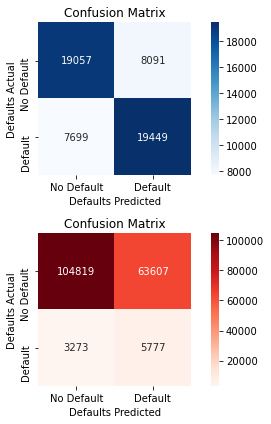

In [134]:
y_pred = xclf.predict(X_tr_rs)
y_pred2 = xclf.predict(X_val)

APRF2(y_tr_rs, y_pred, y_val, y_pred2)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

[00:31:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

[00:31:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params: {'colsample_bytree': 0.6879505109705024, 'learning_rate': 0.10224650453376416, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 341, 'subsample': 0.6760329624689282}

Training:
Accuracy:  0.8121224399587447
Precision: 0.8098738343390016
Recall:    0.8157506998673936
F1:        0.8128016442478849
Fbeta:     0.8145685133554514

Validation:
Accuracy:  0.6223714755797967
Precision: 0.08270947307803052
Recall:    0.6348066298342542
F1:        0.14635078333970195
Fbeta:     0.27186257808063596


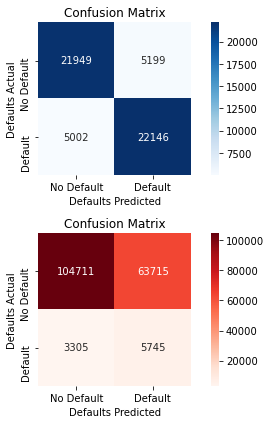

In [138]:
import scipy.stats as stats

param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

# numFolds = 5
# kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(xclf, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 5, 
                         scoring = 'f1')

clf.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {clf.best_params_}")
y_predict = clf.predict(X_tr_rs)

y_predict2 = clf.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

## Logistic Regression

ROC AUC   0.6702798133371444
ROC AUC   0.6735583651898733

Training:
Accuracy:  0.6232134963901577
Precision: 0.624506811583414
Recall:    0.6180197436275232
F1:        0.6212463435405636
Fbeta:     0.6193063532607893

Validation:
Accuracy:  0.6277975613604093
Precision: 0.08229897858995588
Recall:    0.6205524861878453
F1:        0.14532469044754104
Fbeta:     0.26886507913710395


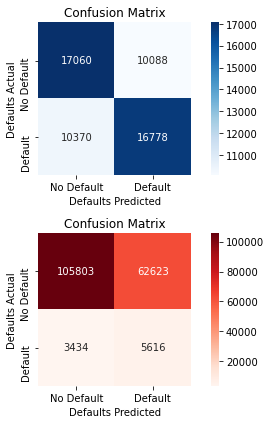

In [58]:
#lr = LogisticRegression(C=1000, class_weight='balanced' )
lr = LogisticRegression()

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_tr_rs)
X_val_scaled = ss.transform(X_val)

lr.fit(X_train_scaled, y_tr_rs)

lr.score(X_train_scaled, y_tr_rs)

y_preds = lr.predict(X_train_scaled)
y_preds2 = lr.predict(X_val_scaled)

print('ROC AUC   {}'.format(roc_auc_score(y_tr_rs, lr.predict_proba(X_train_scaled)[:,1])))
print('ROC AUC   {}'.format(roc_auc_score(y_val, lr.predict_proba(X_val_scaled)[:,1])))

APRF2(y_tr_rs, y_preds, y_val, y_preds2)

Best params: {'C': 100, 'class_weight': 'balanced'}

Training:
Accuracy:  0.6232319139531457
Precision: 0.6245207875832806
Recall:    0.6180565787534993
F1:        0.6212718689252984
Fbeta:     0.6193386928886231

Validation:
Accuracy:  0.6278031959250828
Precision: 0.08231242672919109
Recall:    0.6206629834254144
F1:        0.14534868676413507
Fbeta:     0.2689103791650709


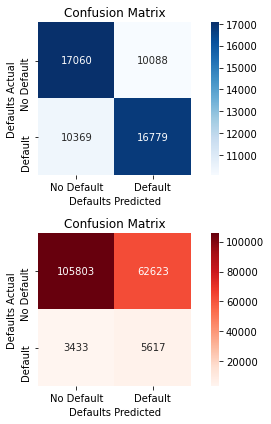

In [59]:
param_grid = {'C':[100, 200, 500, 1000, 1500, 2000],
              "class_weight":['balanced', None]}
lrcv = GridSearchCV(estimator=lr, cv=5, param_grid = param_grid)
lrcv.fit(X_train_scaled, y_tr_rs)
print(f"Best params: {lrcv.best_params_}")
y_predict = lrcv.predict(X_train_scaled)

y_predict2 = lrcv.predict(X_val_scaled)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

## KNN

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_tr_rs)
knn.score(X_train_scaled, y_tr_rs)

NameError: name 'X_train_scaled' is not defined


Training:
Accuracy:  0.5
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0

Validation:
Accuracy:  0.9490071897045235
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0


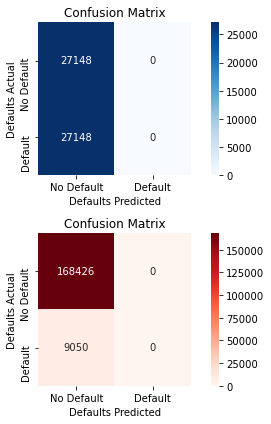

In [147]:
y_preds_knn = knn.predict(X_tr_rs)
y_preds_knn2 = knn.predict(X_val)


APRF2(y_tr_rs, y_preds_knn, y_val, y_preds_knn2)

Best params: {'n_neighbors': 19}

Training:
Accuracy:  0.6472852512155591
Precision: 0.6425337753537946
Recall:    0.6639531457197584
F1:        0.6530678792050869
Fbeta:     0.6595557832339275

Validation:
Accuracy:  0.564921454168451
Precision: 0.06925662866820008
Recall:    0.605524861878453
F1:        0.12429686082380692
Fbeta:     0.23758736104607803


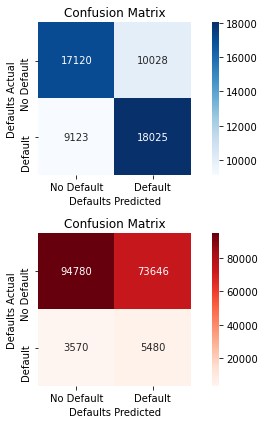

In [149]:
param_grid = {'n_neighbors':range(1,31)}
lrcv = RandomizedSearchCV(estimator=knn, cv=5, param_distributions = param_grid,
                         scoring='f1')
lrcv.fit(X_train_scaled, y_tr_rs)
print(f"Best params: {lrcv.best_params_}")
y_predict = lrcv.predict(X_train_scaled)

y_predict2 = lrcv.predict(X_val_scaled)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

In [53]:
nb = BernoulliNB()
nb.fit(X_tr_rs, y_tr_rs)
nb.score(X_tr_rs, y_tr_rs)


0.5944452630027994


Training:
Accuracy:  0.5944452630027994
Precision: 0.5951532695019669
Recall:    0.5907249152792102
F1:        0.5929308241209745
Fbeta:     0.5916053062609749

Validation:
Accuracy:  0.5947057630327481
Precision: 0.07359084251071447
Recall:    0.5995580110497237
F1:        0.13109130004107172
Fbeta:     0.24678892406214747


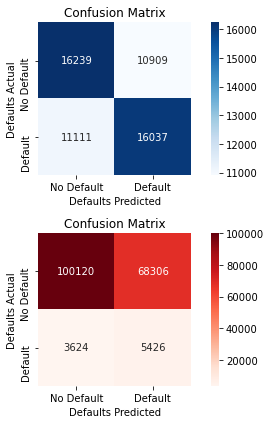

In [54]:
y_preds_nb = nb.predict(X_tr_rs)
y_preds_nb2 = nb.predict(X_val)


APRF2(y_tr_rs, y_preds_nb, y_val, y_preds_nb2)

In [62]:
from sklearn.ensemble import VotingClassifier


model_list = [('nb', nb),
              ('knn', knn),
              ('lr', lr)]
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard')
voting_classifer.fit(X_train_scaled, y_tr_rs)


VotingClassifier(estimators=[('nb', BernoulliNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('lr', LogisticRegression())])


Training:
Accuracy:  0.6585752173272432
Precision: 0.6579816513761468
Recall:    0.660453808752026
F1:        0.6592154123313357
Fbeta:     0.6599578922571812

Validation:
Accuracy:  0.6180103225224819
Precision: 0.08075934912931773
Recall:    0.6251933701657458
F1:        0.14304133485020856
Fbeta:     0.26623376623376627


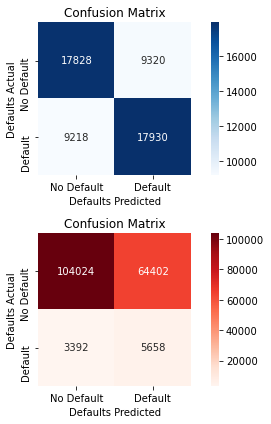

In [63]:
y_preds_vote = voting_classifer.predict(X_train_scaled)
y_preds_vote2 = voting_classifer.predict(X_val_scaled)

APRF2(y_tr_rs, y_preds_vote, y_val, y_preds_vote2)

## Combining Train & Val and running final model on Test

In [66]:
X_train_and_val = pd.concat([X_train, X_val])
y_train_and_val = pd.concat([y_train, y_val])
X_train_and_val.shape, y_train_and_val.shape

((709903, 77), (709903,))

In [ ]:
#Best params: {'n_estimators': 50, 'max_features': 20, 'max_depth': 10, 'criterion': 'gini'}

rf = RandomForestClassifier(n_estimators = 50, max_features = 20, max_depth = 10, criterion = 'gini')

rfcv = RandomizedSearchCV(estimator=rf, cv=5, scoring='f1', param_distributions={})

rfcv.fit(X_train_and_val, y_train_and_val)

In [70]:
y_preds = voting_classifer.predict(X_train_and_val)
y_preds2 = voting_classifer.predict(X_test)

APRF2(y_train_and_val, y_preds, y_test, y_preds2)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 